# Browian Dynamics 
(BOAP algorithm: *BJ Leimkuhler and C Matthews Appl. Math. Res. eXpress 2013, 34–56 (2013); J. Chem. Phys. 138, 174102 (2013)*)



\begin{equation}
\bold{\dot{p}} = -\gamma\bold{p} + \sigma \bold{\dot{w}} 
\end{equation}
where:
<br>
1. $\gamma\bold{p}$ is the friction force. It simulates the effect of the bath (solvent) on the system.
<br>
2. $\sigma\bold{\dot{w}}$ is the random force, which is represented by the derivate of a Wiener process $\bold{w}$.
<br>
3. $\sigma = \sqrt{2 \gamma m k_B T}$ governs the strenght of the random force (it is related to the friction coefficient via the fluctuation-dissipation theorem)
<br>
\begin{equation}
d\bold{p} = -\gamma\bold{p} dt + \sigma d\bold{w}
\end{equation}

<br>

\begin{equation}
\bold{p\left(t + \delta t\right)} = \exp(-\gamma\delta t) \bold{p\left(t\right)} + \sqrt{1-\exp(-2\gamma\delta t)}\sqrt{m k_B T} \bold{G}
\end{equation}


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import simulation as sim
import importlib
importlib.reload(sim)

<module 'simulation' from 'c:\\Users\\gian.pio.domiziani\\develop\\develop\\brownian_dynamics\\simulation.py'>

In [63]:
# Enable interactive plot
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

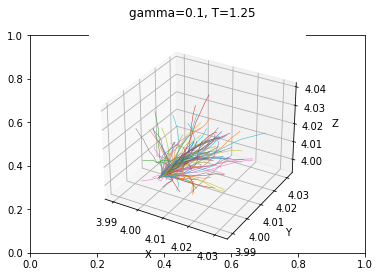

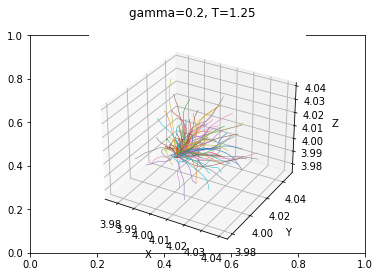

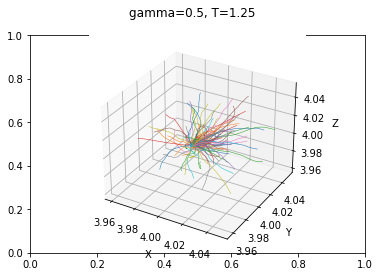

In [64]:
# Set default values, check keys and typecheck values
DT = 7e-4
NSTEPS = 1000
T = [1.25]
GAMMA = [0.1, 0.2, 0.5]
N = 100
r = 4.0
p = 0.25
BOX = 8.0
F = 0.0
STEP = p*DT + np.sqrt(DT)
np.random.seed(1234)
for i, g in enumerate(GAMMA):
    for temp in T:
        rs, ps = sim.main(DT, r, p, g, BOX, temp, N, NSTEPS, F)
        fig_xs, ax1 = plt.subplots(1, 1)
        ax1 = fig_xs.add_subplot(projection='3d')
        _ = fig_xs.suptitle(f'gamma={g}, T={temp}')
        for i in range(N):
            _ = ax1.plot(rs[:, i, 0], rs[:, i, 1], rs[:, i, 2], lw=.5)
            _ = ax1.set_xlabel('X')
            _ = ax1.set_ylabel('Y')
            _ = ax1.set_zlabel('Z')
            # _ = ax1.set_xlim(r - STEP, r + STEP)
            # _ = ax1.set_ylim(r - STEP, r + STEP)
            # _ = ax1.set_zlim(r -STEP, r + STEP)
        plt.show()

In [65]:
np.random.seed(123456789)
DT = 1e-3
NSTEPS = 3000
p = [9.8, 17.23]
DATA = {'RS': {
    'gamma': [], 
    'T': [], 
    'mean': [], 
    'mean_square': []
    }, 
    'PS': {
            'p0': [],
            'gamma': [], 
            'T': [], 
            'mean': [], 
            'mean_square': []
            }
    } 

for g in GAMMA:
    for temp in T:
        for o in p:
            rs, ps = sim.main(DT, r, o, g, BOX, temp, N, NSTEPS, F, periodic=False)
            R = np.asarray([r[0] for r in rs])
            P = np.asarray([p[0] for p in ps])
    
            r_mean = np.mean(R, axis=1) 
            r_mean_square = np.mean(np.square(R), axis=1)
            p_mean = np.mean(P, axis=1) # <v(t)> = 1/N sum(px(t) + py(t) + pz(t)) 
            p_mean_square = np.mean(np.square(P), axis=1) # <v^2(t)> = 1/N sum(px(t)**2 + py(t)**2 + pz(t)**2)
    
            DATA['RS']['mean'].append(r_mean)
            DATA['RS']['mean_square'].append(r_mean_square)
            DATA['PS']['mean'].append(p_mean)
            DATA['PS']['mean_square'].append(p_mean_square)

            DATA['RS']['gamma'].append(g)
            DATA['RS']['T'].append(temp)
            DATA['PS']['gamma'].append(g)
            DATA['PS']['T'].append(temp)
            DATA['PS']['p0'].append(o)

<Figure size 720x576 with 0 Axes>

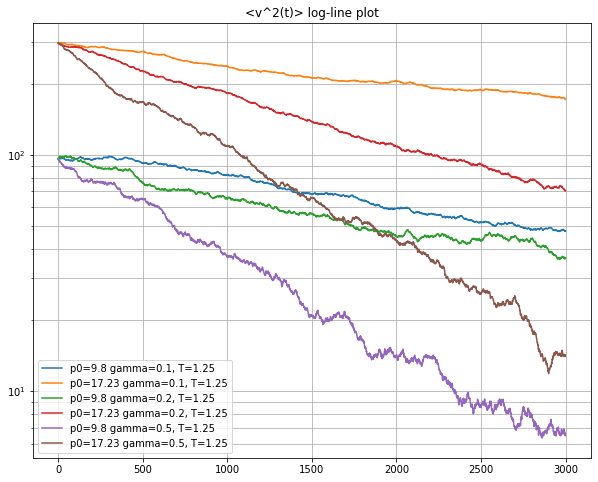

In [66]:
plt.figure(figsize=[10,8])
for i in range(len(DATA['PS']['mean_square'])):
    _ = plt.title('<v^2(t)> log-line plot')
    _ = plt.plot(range(NSTEPS), DATA['PS']['mean_square'][i], label=f'p0={DATA["PS"]["p0"][i]} gamma={DATA["PS"]["gamma"][i]}, T={DATA["PS"]["T"][i]}')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.grid(True, which='both')
plt.show()

### $\left<v^2(t)\right>$ plot:
The quantity follows an exponential decay (showing a line if log scale) for low times, while it reaches the mean constant value of $\sim \sigma^2 / \gamma$ for the equilibrium state (m=1). 

### $\left<x^2(t)\right>$ plot: low times -> linear; high times -> diffusion 

<Figure size 720x576 with 0 Axes>

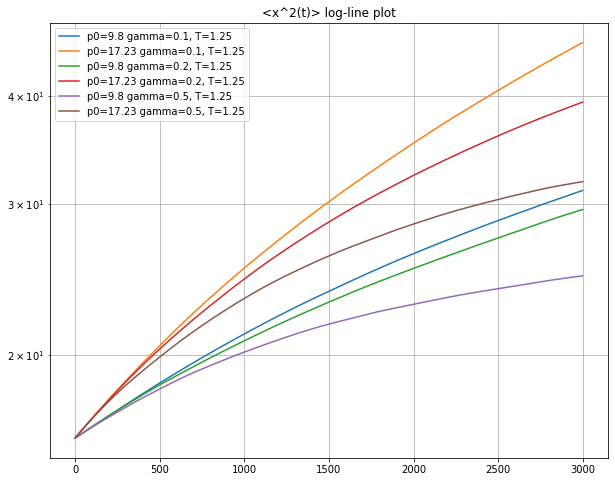

In [67]:
plt.figure(figsize=[10,8])
for i in range(len(DATA['RS']['mean_square'])):
    _ = plt.title('<x^2(t)> log-line plot')
    _ = plt.plot(range(NSTEPS), DATA['RS']['mean_square'][i], label=f'p0={DATA["PS"]["p0"][i]} gamma={DATA["PS"]["gamma"][i]}, T={DATA["PS"]["T"][i]}')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.grid(True, which='both')
plt.show()


In [68]:
# TIMES = 100
# a = 0.98
# T = np.linspace(-10, 10, TIMES)
# A = 1/np.sqrt(2*np.pi)
# f = lambda x: A * np.exp(-x**2/2)
# fs = [f(x) for x in T]
# fst = [s * np.exp(-t) for s, t in zip(*(fs, T))]
# plt.plot(T, fst)